In [ ]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

For simplicity, I’m using synthetic data instead of real-world data. Real-world data typically requires extensive cleaning and preprocessing. In this example, I'm working with straightforward numerical data. In real-world scenarios, datasets often contain text, which would need to be converted into numerical values before analysis.

In [ ]:
# dataset
np.random.seed(42)
num_samples = 10000
data = {
    'claim_amount': np.random.uniform(100, 10000, num_samples),
    'provider_id': np.random.randint(1, 100, num_samples),
    'patient_id': np.random.randint(1, 100, num_samples),
    'is_fraudulent': np.random.choice([0, 1], num_samples, p=[0.80, 0.20]), # 20% data is fraud
    'gender': np.random.choice([0, 1], num_samples),  # Male (0), Female (1)
    'patient_age': np.random.randint(18, 90, num_samples),  # Age between 18 and 90
    'service_type': np.random.choice([0, 1, 2, 3], num_samples)  # 0: emergency, 1: surgery, 2: regular_checkup, 3: vaccine
}
df = pd.DataFrame(data)
df.head()

,claim_amount,provider_id,patient_id,is_fraudulent,gender,patient_age,service_type
0,3807.947177,55,1,0,1,60,1
1,9512.071633,96,44,0,0,56,0
2,7346.740024,36,57,1,1,30,2
3,6026.718994,37,9,0,1,59,3
4,1644.584540,14,5,0,1,62,1


In [ ]:
# split the data into training and testing sets
X = df.drop('is_fraudulent', axis=1) # feature
y = df['is_fraudulent'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In this project, I am addressing a binary classification problem. For simplicity, I have selected the Random Forest Classifier as the model for this task.

In [ ]:
# train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.79


In [ ]:
# functions for prediction

def predict(data):
    df = pd.DataFrame(data, index=[0])
    prediction = model.predict(df)
    probability = model.predict_proba(df)[:, 1]
    return {'is_fraudulent': int(prediction[0]), 'fraud_probability': float(probability[0])}

def get_prediction(claim_amount, provider_id, patient_id, gender, patient_age, service_type):
    data = {
        'claim_amount': claim_amount,
        'provider_id': provider_id,
        'patient_id': patient_id,
        'gender': gender,
        'patient_age': patient_age,
        'service_type': service_type
    }
    return predict(data)

result = get_prediction(5000, 15, 30, 1, 45, 1)
print(result)


{'is_fraudulent': 0, 'fraud_probability': 0.2}


In [ ]:
# interactive prediction
def interactive_prediction():
    claim_amount = float(input("Enter claim amount: "))
    provider_id = int(input("Enter provider ID: "))
    patient_id = int(input("Enter patient ID: "))
    gender = int(input("Enter gender (Male 0 / Female 1): "))
    patient_age = int(input("Enter patient age: "))
    service_type = int(input("Enter service type (emergency 0, surgery 1, regular_checkup 2, vaccine 3): "))

    result = get_prediction(claim_amount, provider_id, patient_id, gender, patient_age, service_type)
    print(f"Prediction: {result['is_fraudulent']}")
    print(f"Fraud Probability: {result['fraud_probability']:.2f}")

interactive_prediction()
›

Enter claim amount: 35000
Enter provider ID: 25
Enter patient ID: 22
Enter gender (Male 0 / Female 1): 1
Enter patient age: 36
Enter service type (emergency 0, surgery 1, regular_checkup 2, vaccine 3): 3
Prediction: 0
Fraud Probability: 0.24


# Data Analysis

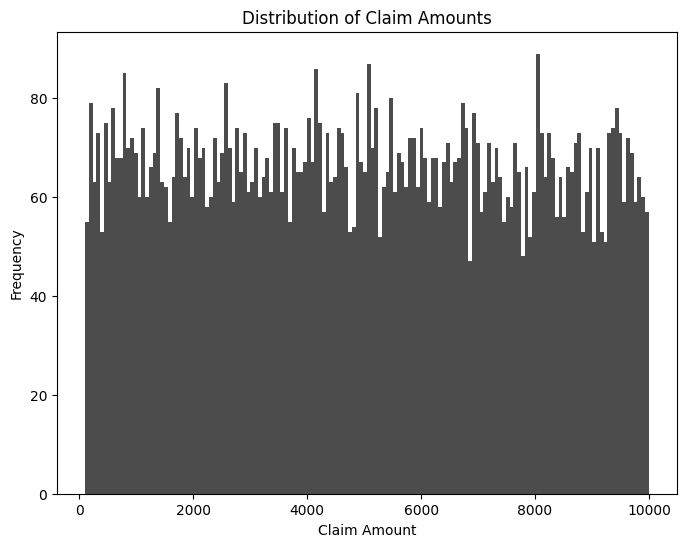

In [ ]:
# distribution of Claim Amounts
plt.figure(figsize=(8, 6))
plt.hist(df['claim_amount'], bins=150, color='black', alpha=0.7)
plt.title('Distribution of Claim Amounts')
plt.xlabel('Claim Amount')
plt.ylabel('Frequency')
plt.show()

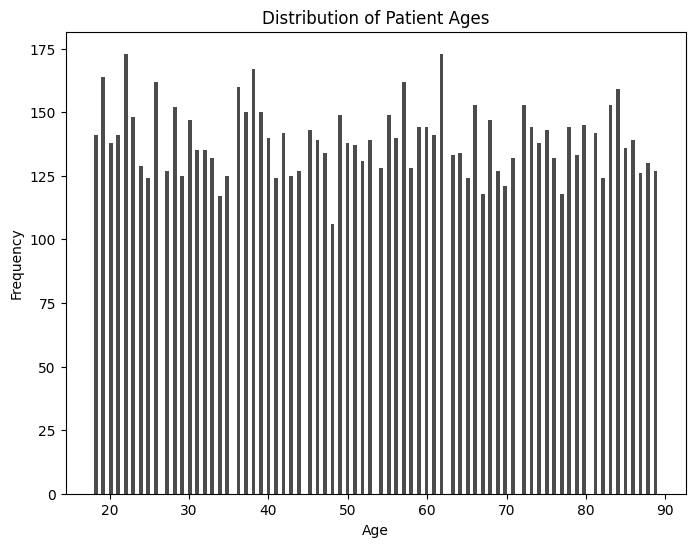

In [ ]:
# age distribution
plt.figure(figsize=(8, 6))
plt.hist(df['patient_age'], bins=150, color='black', alpha=0.7)
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<Figure size 800x600 with 0 Axes>

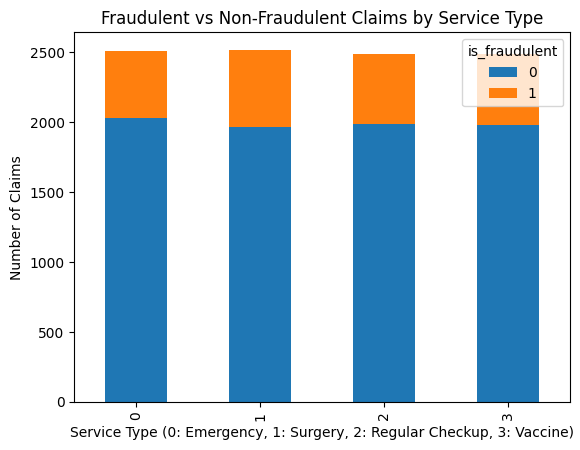

In [ ]:
# fraudulent vs non-fraudulent Claims by Service Type
plt.figure(figsize=(8, 6))
df.groupby(['service_type', 'is_fraudulent']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Fraudulent vs Non-Fraudulent Claims by Service Type')
plt.xlabel('Service Type (0: Emergency, 1: Surgery, 2: Regular Checkup, 3: Vaccine)')
plt.ylabel('Number of Claims')
plt.show()

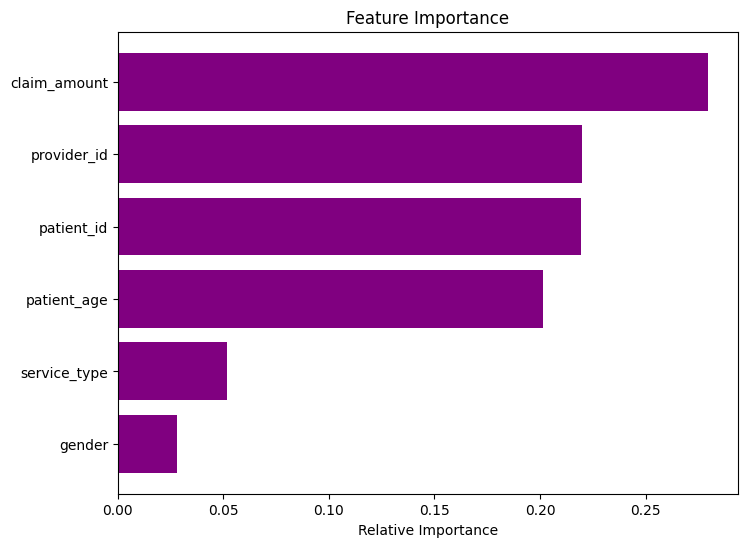

In [ ]:
# feature importance
plt.figure(figsize=(8, 6))
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.show()

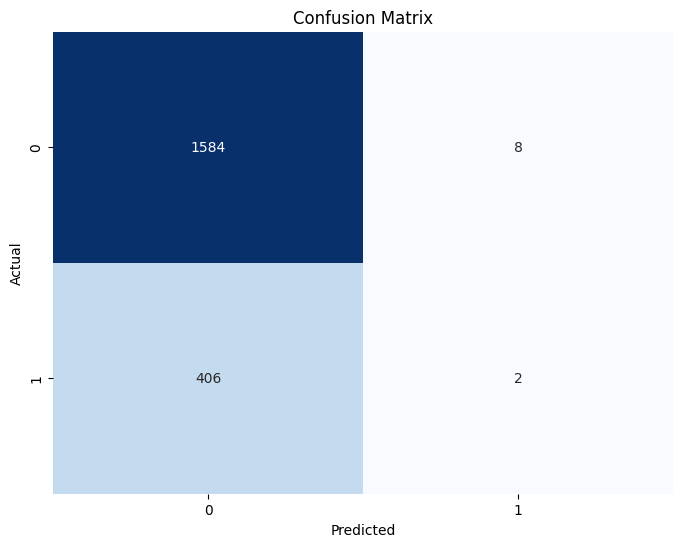

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
